In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Priya/Desktop/DS class/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [4]:
# 1.What is the total number of confirmed cases worldwide? 
df['Confirmed'].sum()

26252051758.0

In [5]:
# 2.How many deaths have been reported globally? 
df['Deaths'].sum()

624013017.0

In [6]:
# 3.What is the total number of recovered cases worldwide? 
df['Recovered'].sum()

15450237912.0

In [7]:
# 4.How many countries/regions are represented in the dataset? 
df['Country/Region'].nunique()

229

In [8]:
# 5.What is the trend of confirmed cases over time globally? 
df.groupby('ObservationDate')['Confirmed'].sum().reset_index()

,ObservationDate,Confirmed
0,01/01/2021,84092619.0
1,01/02/2021,84718978.0
2,01/03/2021,85251774.0
3,01/04/2021,85805892.0
4,01/05/2021,86546014.0
...,...,...
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0


In [9]:
# 6.Which province/state has reported the highest number of confirmed cases? 
clean_df=df.dropna(subset=['Province/State'])
group_df=clean_df.groupby('Province/State')['Confirmed'].sum()
highest_state=group_df.idxmax()
highest_cases=group_df.max()
print('The state with the highest number of confirmed cases is :', highest_state ,'with', highest_cases ,'cases.')

The state with the highest number of confirmed cases is : California with 696898013.0 cases.


In [10]:
# 7.Which country/region has the highest number of deaths? 
clean_df=df.dropna(subset=['Country/Region'])
group_df=clean_df.groupby('Country/Region')['Deaths'].sum()
highest_state=group_df.idxmax()
highest_cases=group_df.max()
print('The state with the highest number of Death cases is :', highest_state ,'with', highest_cases ,'cases.')

The state with the highest number of Death cases is : US with 123303762.0 cases.


In [11]:
# 8.How does the number of confirmed cases vary across different provinces/states? 
Recoveries_of_country=df.groupby(by='Province/State')['Confirmed'].sum().reset_index()
Recoveries_of_country.sort_values(by='Confirmed',ascending=False)

,Province/State,Confirmed
88,California,696898013.0
365,Maharashtra,681186928.0
171,England,666227518.0
630,Texas,552039886.0
570,Sao Paulo,521308945.0
...,...,...
17,American Samoa,0.0
278,Jervis Bay Territory,0.0
526,Recovered,0.0
404,"Montgomery County, TX",0.0


<Axes: >

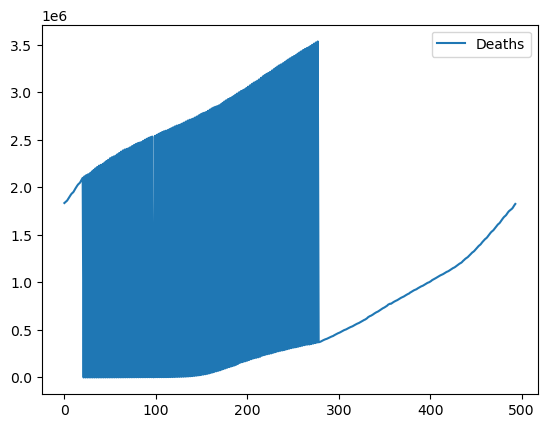

In [12]:
# 9.What is the trend of deaths over time globally? 
df.groupby('ObservationDate')['Deaths'].sum().reset_index().plot(kind='line')

In [13]:
# 10.Which country/region has the highest number of recovered cases? 
Country_recoveries=df.groupby(by='Country/Region')['Recovered'].sum().reset_index()
Country_recoveries.loc[Country_recoveries['Recovered'].idxmax()]

Country/Region           India
Recovered         2900589824.0
Name: 96, dtype: object

In [14]:
# 11.How does the number of recovered cases vary across different countries/regions? 
Recoveries_of_country=df.groupby(by='Country/Region')['Recovered'].sum().reset_index()
Recoveries_of_country.sort_values(by='Recovered',ascending=False)

,Country/Region,Recovered
96,India,2.900590e+09
27,Brazil,2.313677e+09
172,Russia,7.907057e+08
212,Turkey,5.641706e+08
214,US,5.033710e+08
...,...,...
166,Puerto Rico,0.000000e+00
168,Republic of Ireland,0.000000e+00
169,Republic of the Congo,0.000000e+00
170,Reunion,0.000000e+00


<Axes: ylabel='Count'>

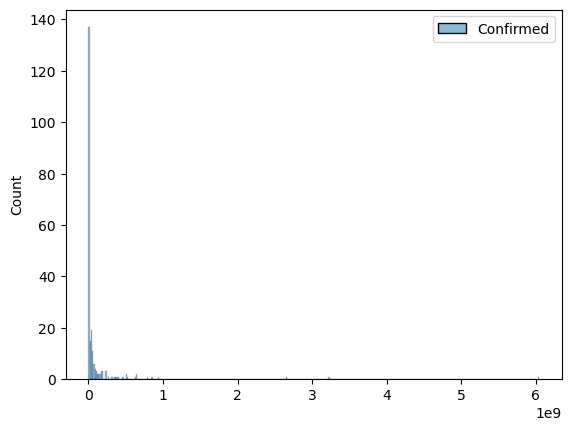

In [15]:
# 12.What is the distribution of confirmed cases by country/region? 
Confirmed_cases=df.groupby(by='Country/Region')['Confirmed'].sum().reset_index()
sns.histplot(Confirmed_cases.sort_values(by='Confirmed',ascending=False))

In [16]:
# 13.Is there a correlation between the number of confirmed cases and deaths? 
Correlation=df['Confirmed'].corr(df['Deaths'])
print(f'Corelation value of confirmed cases and Deaths cases:{Correlation:.2f}')

Corelation value of confirmed cases and Deaths cases:0.89


In [17]:
# 14.Is there a correlation between the number of confirmed cases and recovered cases? 
Correlation=df['Confirmed'].corr(df['Recovered'])
print(f'Correlation value of confirmed cases and Recovered cases :{Correlation:.2f}')

Correlation value of confirmed cases and Recovered cases :0.63


In [18]:
# 15.How does the mortality rate vary across different countries/regions?
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df.groupby('Country/Region')['Mortality Rate'].mean().reset_index()

,Country/Region,Mortality Rate
0,Azerbaijan,0.000000
1,"('St. Martin',)",0.000000
2,Afghanistan,3.436948
3,Albania,2.576052
4,Algeria,4.485453
...,...,...
224,West Bank and Gaza,0.845073
225,Yemen,24.647740
226,Zambia,1.856188
227,Zimbabwe,4.576684


In [19]:
# 16.How does the recovery rate vary across different countries/regions? 
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100
df.groupby('Country/Region')['Recovery Rate'].mean().reset_index()


,Country/Region,Recovery Rate
0,Azerbaijan,0.000000
1,"('St. Martin',)",0.000000
2,Afghanistan,61.835322
3,Albania,59.606364
4,Algeria,60.550581
...,...,...
224,West Bank and Gaza,70.750822
225,Yemen,47.529999
226,Zambia,80.077543
227,Zimbabwe,62.701920


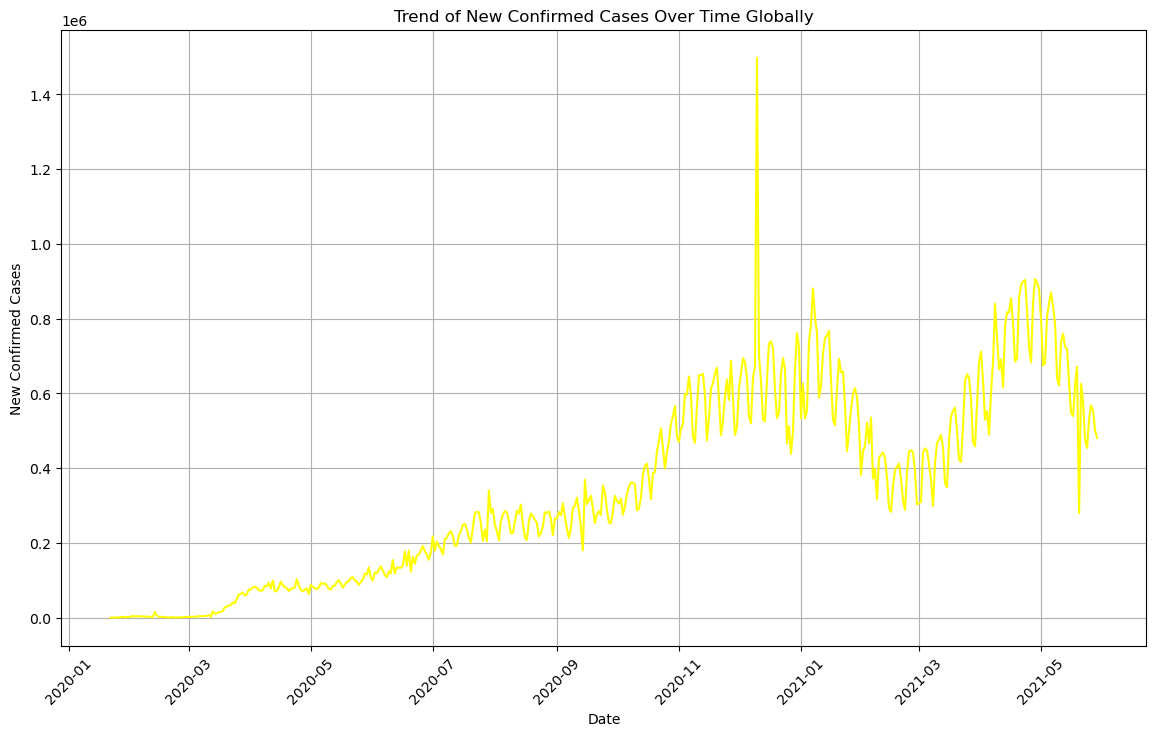

In [20]:
# 17.What is the trend of new confirmed cases over time globally? 
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y')
df = df.sort_values(by='ObservationDate')
global_confirmed = df.groupby('ObservationDate')['Confirmed'].sum().reset_index()
global_confirmed['New Confirmed Cases'] = global_confirmed['Confirmed'].diff().fillna(0)
plt.figure(figsize=(14, 8))
plt.plot(global_confirmed['ObservationDate'], global_confirmed['New Confirmed Cases'], color='yellow')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.title('Trend of New Confirmed Cases Over Time Globally')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

In [21]:
# 18.How does the fatality rate vary across different provinces/states? 
df['Fatality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df.groupby('Province/State')['Fatality Rate'].mean().reset_index()

,Province/State,Fatality Rate
0,"Montreal, QC",0.000000
1,"Norfolk County, MA",0.000000
2,Abruzzo,7.325851
3,Acre,2.171125
4,Adygea Republic,0.918441
...,...,...
731,Zaporizhia Oblast,1.773536
732,Zeeland,2.832895
733,Zhejiang,0.073100
734,Zhytomyr Oblast,1.804765


In [22]:
# 19.How does the recovery rate vary across different provinces/states? 
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100
df.groupby('Province/State')['Recovery Rate'].mean().reset_index()

,Province/State,Recovery Rate
0,"Montreal, QC",0.000000
1,"Norfolk County, MA",0.000000
2,Abruzzo,68.279022
3,Acre,76.041760
4,Adygea Republic,83.223004
...,...,...
731,Zaporizhia Oblast,61.226568
732,Zeeland,0.000000
733,Zhejiang,93.552406
734,Zhytomyr Oblast,71.089603


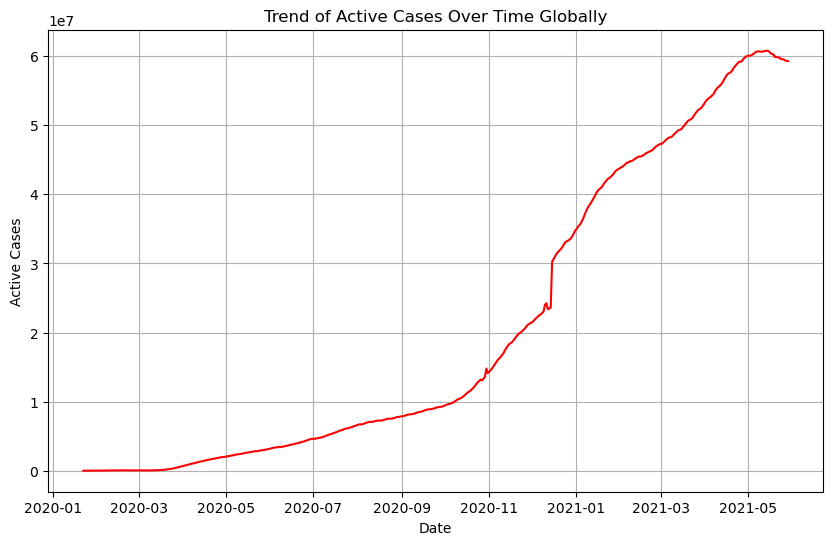

In [23]:
# 20.What is the trend of active cases over time globally? 
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y')
df = df.sort_values(by='ObservationDate')
df['ActiveCases'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])
global_active_cases = df.groupby('ObservationDate')['ActiveCases'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(global_active_cases['ObservationDate'], global_active_cases['ActiveCases'], color='red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Trend of Active Cases Over Time Globally')
plt.grid(True)
plt.show()